In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('911.csv')

In [54]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: reason, Length: 99492, dtype: object

In [55]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


In [56]:
df['reason'].size

99492

In [57]:
sum(df['reason'].value_counts())

99492

In [58]:
df['reason'].count()

99492

<AxesSubplot:xlabel='reason', ylabel='count'>

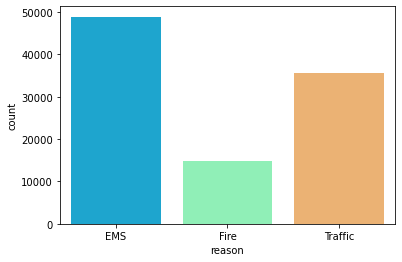

In [59]:
sns.countplot(x = 'reason', data = df, palette = 'rainbow')

In [60]:
type(df['timeStamp'].iloc[0])

str

In [61]:
df['timeStamp']

0        2015-12-10 17:40:00
1        2015-12-10 17:40:00
2        2015-12-10 17:40:00
3        2015-12-10 17:40:01
4        2015-12-10 17:40:01
                ...         
99487    2016-08-24 11:06:00
99488    2016-08-24 11:07:02
99489    2016-08-24 11:12:00
99490    2016-08-24 11:17:01
99491    2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: object

In [62]:
df['timeStampDT'] = pd.to_datetime(df['timeStamp'])

In [63]:
df['hour'] = df['timeStampDT'].apply(lambda time : time.hour)
df['month'] = df['timeStampDT'].apply(lambda time : time.month)
df['dayOfWeek'] = df['timeStampDT'].apply(lambda time : time.dayofweek)
df['day'] = df['timeStampDT'].apply(lambda time : time.day)
df['hour']

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: hour, Length: 99492, dtype: int64

In [64]:
dayMap = {0:'Mon',1:'Tue',2:'Wen',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}

In [65]:
df['dayOfWeek'] = df['dayOfWeek'].map(dayMap)
df['dayOfWeek'] 

0        Thur
1        Thur
2        Thur
3        Thur
4        Thur
         ... 
99487     Wen
99488     Wen
99489     Wen
99490     Wen
99491     Wen
Name: dayOfWeek, Length: 99492, dtype: object

<AxesSubplot:xlabel='dayOfWeek', ylabel='count'>

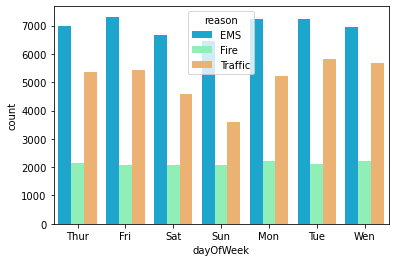

In [66]:
sns.countplot(data=df, x='dayOfWeek', hue="reason",palette='rainbow')

In [67]:
dayHour = df.groupby(by=["dayOfWeek", "hour"]).count()['reason'].unstack()
dayHour.head(12)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thur,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wen,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


In [68]:
dayMonth = df.groupby(by = ['dayOfWeek', 'month']).count()['reason'].unstack()


In [69]:
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='month', ylabel='dayOfWeek'>

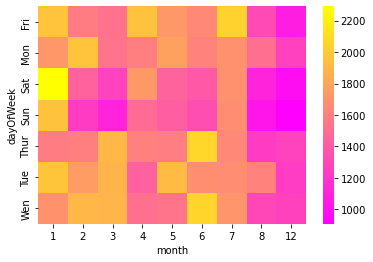

In [70]:
sns.heatmap(dayMonth, cmap='spring')